In [1]:
# importing requirements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set()

## 1- Loading Data

In [2]:
# loading data into a pandas datafrome (df)
row_data = pd.read_csv('Used Car Price Data.csv')

In [3]:
# printing the first 3 rows of the dataframe
row_data.head(3)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500


In [4]:
# renaming columns to lowercase format
row_data.rename(columns = lambda x:x.lower(), inplace=True)

## 2- Assessing Data

In [5]:
# Displaying descriptive statistics about data features
row_data.describe(include='all')

,brand,price,body,mileage,enginev,engine type,registration,year,model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
# dropping 'model' feature for initial analysis (312 Unique Values)
# feature can be added later to check model improvements
focus_data = row_data.drop('model', axis=1)

In [7]:
# checking that the datatype of each feature in the propper format for modeling
focus_data.dtypes

brand            object
price           float64
body             object
mileage           int64
enginev         float64
engine type      object
registration     object
year              int64
dtype: object

In [8]:
# checking for null values
focus_data.isnull().sum()

brand             0
price           172
body              0
mileage           0
enginev         150
engine type       0
registration      0
year              0
dtype: int64

In [9]:
# checking for duplicated rows
focus_data.duplicated().sum()

np.int64(93)

In [10]:
# dropping rows with null values
data_cleaned = focus_data.dropna(axis=0)
data_cleaned = data_cleaned.drop_duplicates()
print(data_cleaned.isnull().sum().sum(), data_cleaned.duplicated().sum(), sep='\n')

0
0


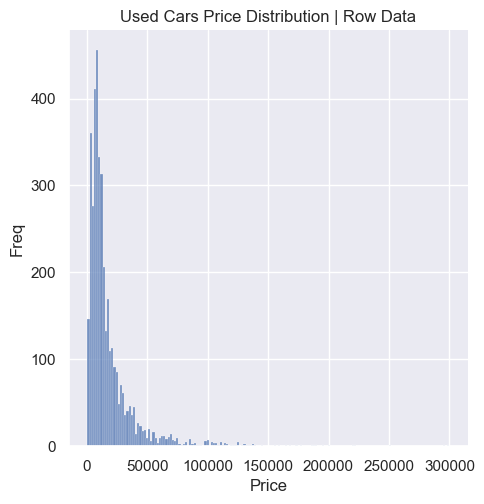

In [11]:
# plotting the distribution of the dependent variable (price)
sns.displot(data_cleaned.price)
plt.title('Used Cars Price Distribution | Row Data')
plt.xlabel('Price')
plt.ylabel('Freq');

### >>> Checking for outliers in the dependent varible (Price)

In [12]:
# displaying descriptive statistics about the dependent variable (Price)
data_cleaned.price.describe()

count      3959.000000
mean      18926.857025
std       24545.658273
min         600.000000
25%        6950.000000
50%       11300.000000
75%       21200.000000
max      300000.000000
Name: price, dtype: float64

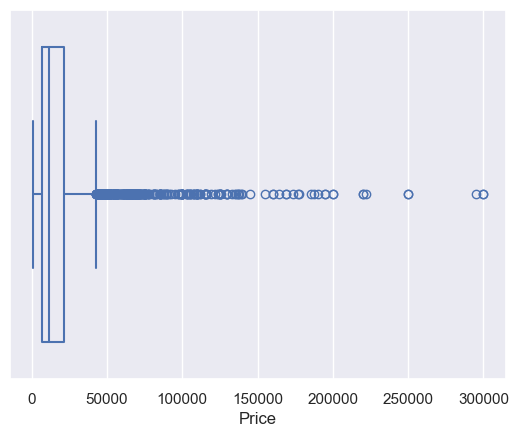

In [13]:
# Checking price outliers via boxplot
sns.boxplot(data_cleaned.price, orient='h', fill=False)
plt.xlabel('Price');

### >>> Cutting top 1% of the price data to remove outliers

In [14]:
# copying dataframe into data_cutted object
data_cutted = data_cleaned.copy()

In [15]:
# finding the 99% value of the price column
cut = data_cutted.price.quantile(0.99)
cut

np.float64(125000.0)

In [16]:
# filtering data to remove the top 1% of the price data
data_cutted = data_cutted[data_cutted.price < cut]

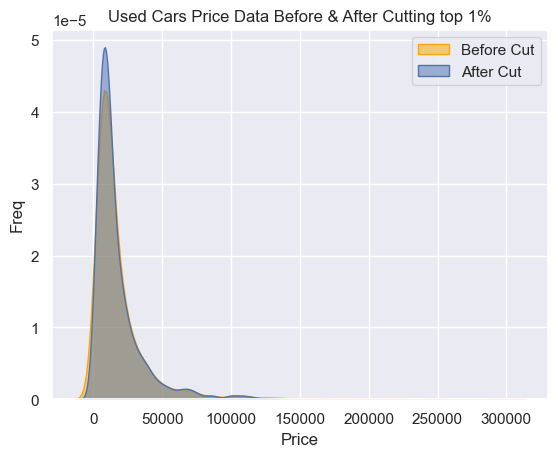

In [17]:
# plotting the PDFs of the price before and after cutting for comparison
plt.figure()
sns.kdeplot(data_cleaned.price, color='orange', fill=True, alpha=0.5, label = 'Before Cut')
sns.kdeplot(data_cutted.price, fill=True, alpha=0.5, label='After Cut')
plt.title('Used Cars Price Data Before & After Cutting top 1%')
plt.xlabel('Price')
plt.ylabel('Freq')
plt.legend();

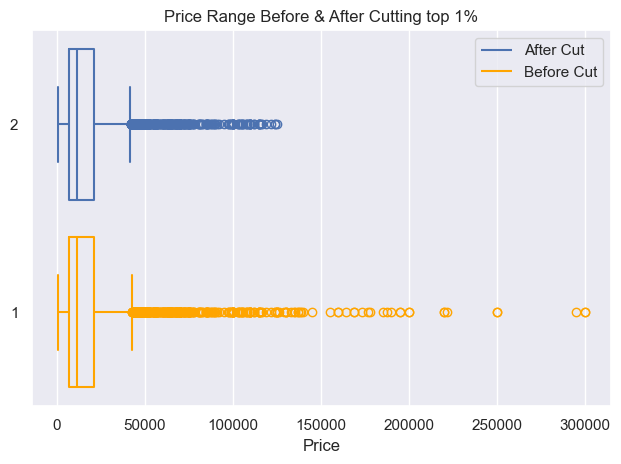

In [18]:
# plotting the boxplots of the price before and after cutting for comparison
sns.boxplot(x=data_cutted.price, y= 2, orient='h', fill=False, label='After Cut')
sns.boxplot(x=data_cleaned.price, y=1, orient='h', fill=False, label='Before Cut', color='orange')
plt.title('Price Range Before & After Cutting top 1%')
plt.xlabel('Price')
plt.tight_layout()
plt.show();

In [19]:
# displaying aftercut descriptive statistics
data_cutted.describe()

,price,mileage,enginev,year
count,3918.000000,3918.000000,3918.000000,3918.000000
mean,17293.577836,166.554109,2.744513,2006.188106
std,18063.109785,102.497705,4.995953,6.659415
min,600.000000,0.000000,0.600000,1969.000000
25%,6900.000000,95.000000,1.800000,2002.000000
50%,11200.000000,160.000000,2.200000,2007.000000
75%,20844.362500,230.000000,3.000000,2011.000000
max,124999.000000,980.000000,99.990000,2016.000000


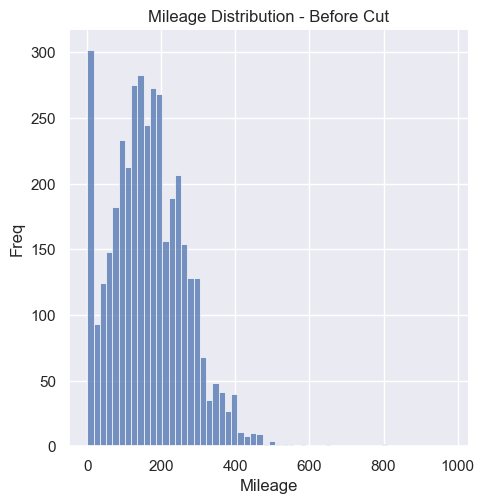

In [20]:
# plotting the distribution of the feature (mileage)
sns.displot(data_cutted.mileage)
plt.xlabel('Mileage')
plt.ylabel('Freq')
plt.title('Mileage Distribution - Before Cut');

In [21]:
# finding the 99% value of the mileage column
mileage_cut = data_cutted.mileage.quantile(0.99)
mileage_cut

np.float64(437.4899999999998)

In [22]:
# cutting the top 1% of the mileage values
data_cutted_2 = data_cutted[data_cutted.mileage < mileage_cut].copy()

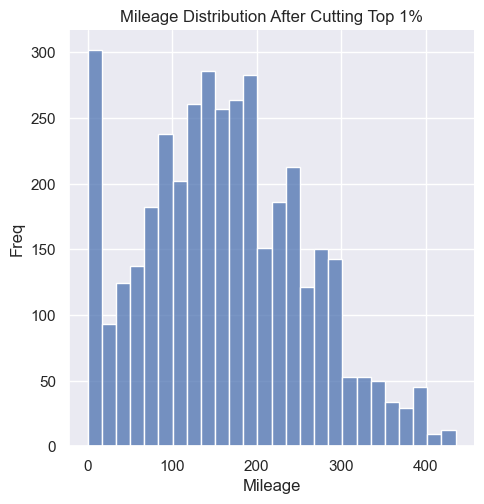

In [23]:
# plotting the distribution of the mileage column after cut
sns.displot(data_cutted_2.mileage)
plt.xlabel('Mileage')
plt.ylabel('Freq')
plt.title('Mileage Distribution After Cutting Top 1%');

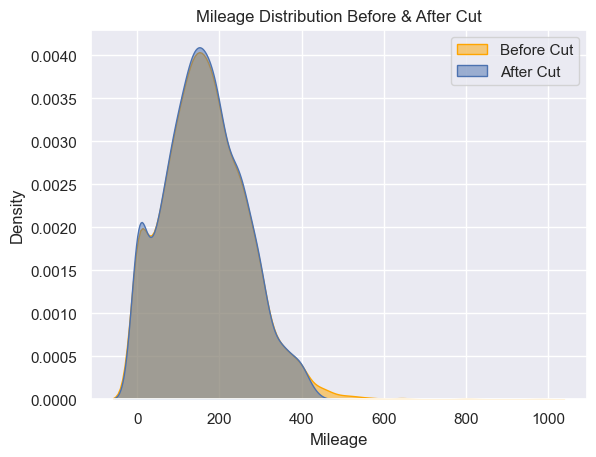

In [24]:
# plotting the distribution of mileage before & after cut
sns.kdeplot(data_cutted.mileage, alpha=0.5, fill=True, label='Before Cut', color='orange')
sns.kdeplot(data_cutted_2.mileage, alpha=0.5, fill=True, label='After Cut')
plt.xlabel('Mileage')
plt.title('Mileage Distribution Before & After Cut')
plt.legend();

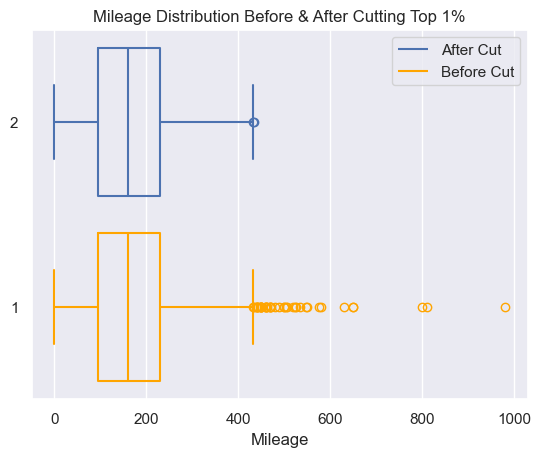

In [25]:
# comparing the range of mileage before and after cut
sns.boxplot(x=data_cutted_2.mileage, y=2, orient='h', fill=False, label = 'After Cut')
sns.boxplot(x=data_cutted.mileage, y=1, orient='h', fill=False, label = 'Before Cut', color='orange')
plt.xlabel('Mileage')
plt.title('Mileage Distribution Before & After Cutting Top 1%');

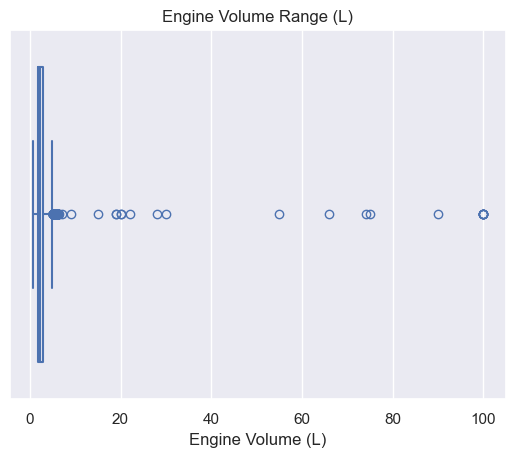

In [26]:
# plotting the range of the engine volume column
sns.boxplot(data_cutted_2.enginev, orient='h', fill=False)
plt.xlabel('Engine Volume (L)')
plt.title('Engine Volume Range (L)');

In [27]:
# cutting engine volume greater than 6.5 Liters (Unlogical Inputs)
data_cutted_3 = data_cutted_2[data_cutted_2.enginev < 6.5].copy()

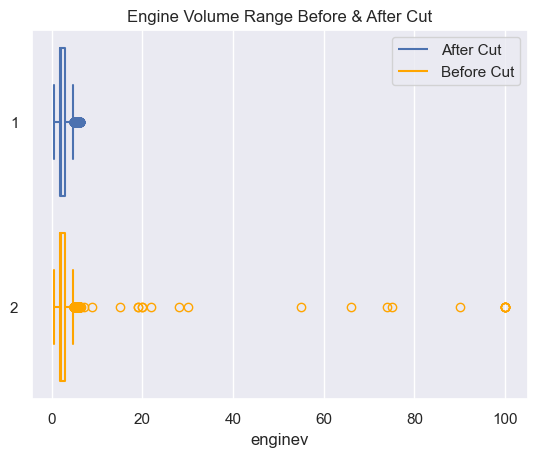

In [28]:
# plotting the range of engine volume after cut
sns.boxplot(x=data_cutted_3.enginev, y=1, orient='h', fill=False, label='After Cut')
sns.boxplot(x=data_cutted_2.enginev, y=2, orient='h', fill=False, label='Before Cut', color='orange')
plt.title('Engine Volume Range Before & After Cut');

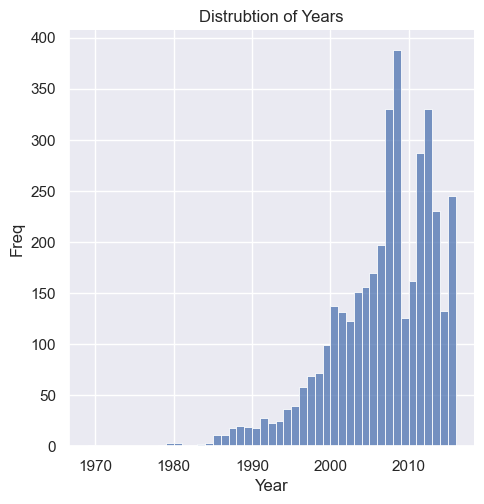

In [29]:
# plotting the distribution of the year column
sns.displot(data_cutted_3.year)
plt.xlabel('Year')
plt.ylabel('Freq')
plt.title('Distrubtion of Years');

In [30]:
# copying dataframe
data_cutted_4 = data_cutted_3.copy()

In [31]:
# specifying the 1% value of the year column
cut_4 = data_cutted_4.year.quantile(0.01)
cut_4

np.float64(1987.0)

In [32]:
# cutting the lower 1% data from the year column
data_cutted_4 = data_cutted_4[data_cutted_4.year > cut_4]

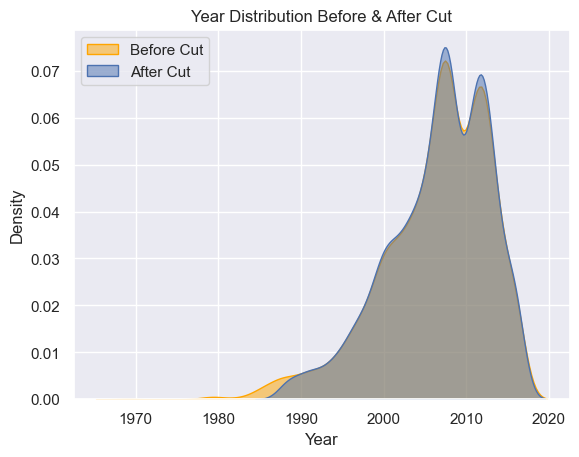

In [33]:
# plotting the distribution of years before & after cut
sns.kdeplot(data_cutted_3.year, fill=True, label='Before Cut', color='orange', alpha=0.5)
sns.kdeplot(data_cutted_4.year, fill=True, label='After Cut', alpha=0.5)
plt.xlabel('Year')
plt.title('Year Distribution Before & After Cut')
plt.legend();

In [34]:
# resetting index after dropping rows
data_cleaned = data_cutted_4.reset_index(drop=True)

In [35]:
# displaying discriptive statistics summary for cleaned data
data_cleaned.describe()

,price,mileage,enginev,year
count,3801.000000,3801.000000,3801.000000,3801.000000
mean,17640.389926,161.945014,2.446112,2006.609050
std,18162.432143,95.277036,0.947914,6.085726
min,800.000000,0.000000,0.600000,1988.000000
25%,7150.000000,94.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21000.000000,228.000000,3.000000,2011.000000
max,124999.000000,435.000000,6.300000,2016.000000


## 3- Checking the Before Modelling OLS Assumptions:

In [36]:
# displaying cleaned data head
data_cleaned.head(3)

,brand,price,body,mileage,enginev,engine type,registration,year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003


In [37]:
# specifying numerical columns
numerical_features = ['year', 'mileage', 'enginev']

### 3.1- Linearity Ckeck:

In [38]:
# displaying the correlation between each numerical feature and the dependent variable (price)
data_cleaned[['price', 'year', 'mileage', 'enginev']].corr().price

price      1.000000
year       0.569377
mileage   -0.547527
enginev    0.394428
Name: price, dtype: float64

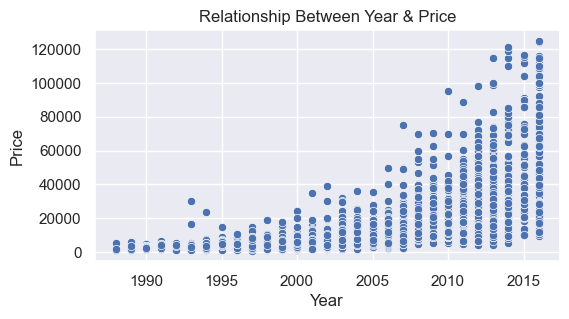

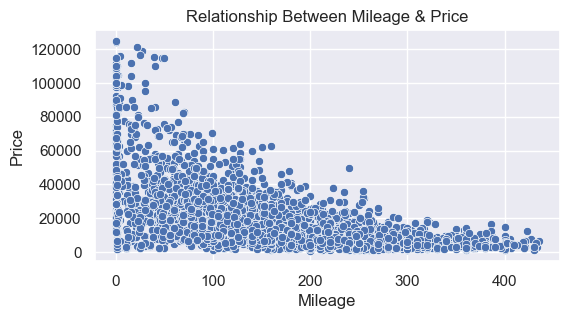

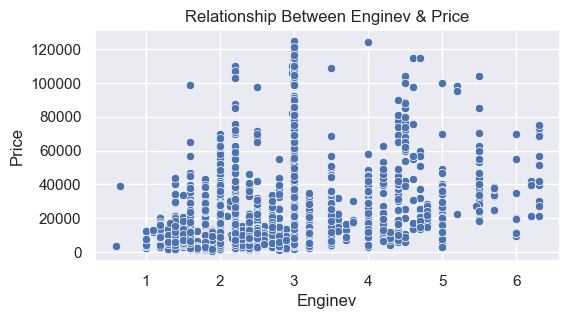

In [39]:
# plotting the relationship bewtween each numerical feature and the dependent variable (price)
for col in numerical_features:
    plt.figure(figsize=(6, 3))
    sns.scatterplot(x=data_cleaned[col], y=data_cleaned.price)
    plt.xlabel(col.title())
    plt.ylabel('Price')
    plt.title(f'Relationship Between {col.title()} & Price');

#### >>> Weak Linearity Handling: Log-Linear Transform

In [40]:
# log-transforming the dependent variable (price)
data_cleaned['log_price'] = np.log(data_cleaned.price)

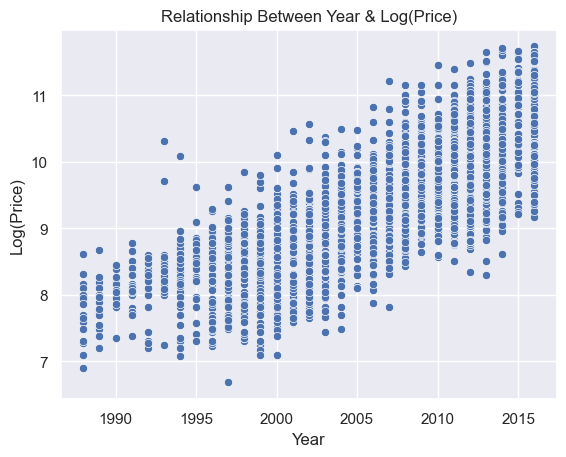

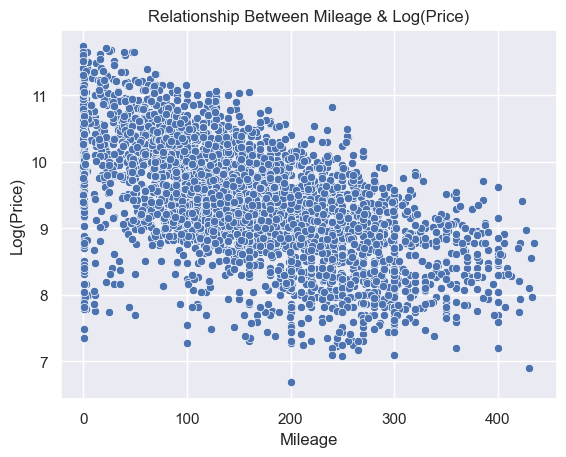

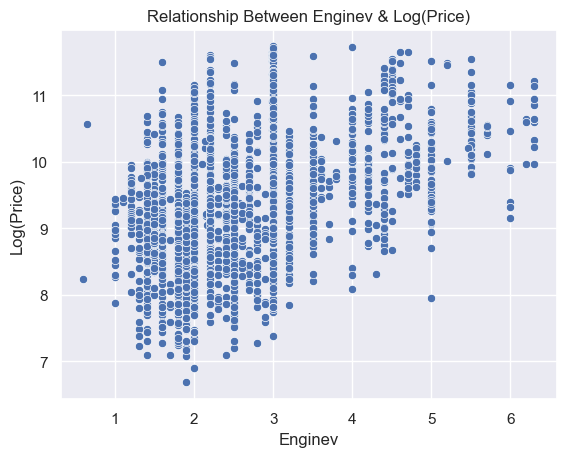

In [41]:
# plotting the relationship beatween each numerical feature and the log of the dependent variable (log(price))
for col in numerical_features:
    plt.figure()
    sns.scatterplot(x=data_cleaned[col], y=data_cleaned.log_price)
    plt.xlabel(col.title())
    plt.ylabel('Log(Price)')
    plt.title(f'Relationship Between {col.title()} & Log(Price)');

In [42]:
# displaying the correlation between each numerical feature and the dependent variable (log(price))
data_cleaned[['log_price', 'year', 'mileage', 'enginev']].corr()['log_price']

log_price    1.000000
year         0.742580
mileage     -0.605830
enginev      0.410676
Name: log_price, dtype: float64

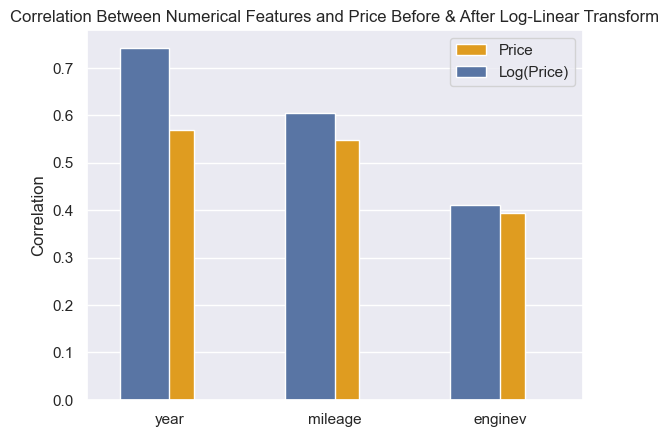

In [43]:
# plotting the absolute correlation value between the numerical features before and after the log-linear transform
price_corr = data_cleaned[['price', 'year', 'mileage', 'enginev']].corr()['price'].drop('price')
log_price_corr = data_cleaned[['log_price', 'year', 'mileage', 'enginev']].corr()['log_price'].drop('log_price')
sns.barplot(x= price_corr.index, y=np.abs(price_corr.values), color='orange', label='Price', width=0.3, align='edge')
sns.barplot(x=log_price_corr.index, y=np.abs(log_price_corr.values), label='Log(Price)', width=0.3, align='center')
plt.title('Correlation Between Numerical Features and Price Before & After Log-Linear Transform')
plt.xlabel('')
plt.ylabel('Correlation')
plt.legend();

In [44]:
# dropping the price column and keep the log_price column
data_log_linear = data_cleaned.drop('price', axis=1)

### 3.2- No Multicollinearity Check:

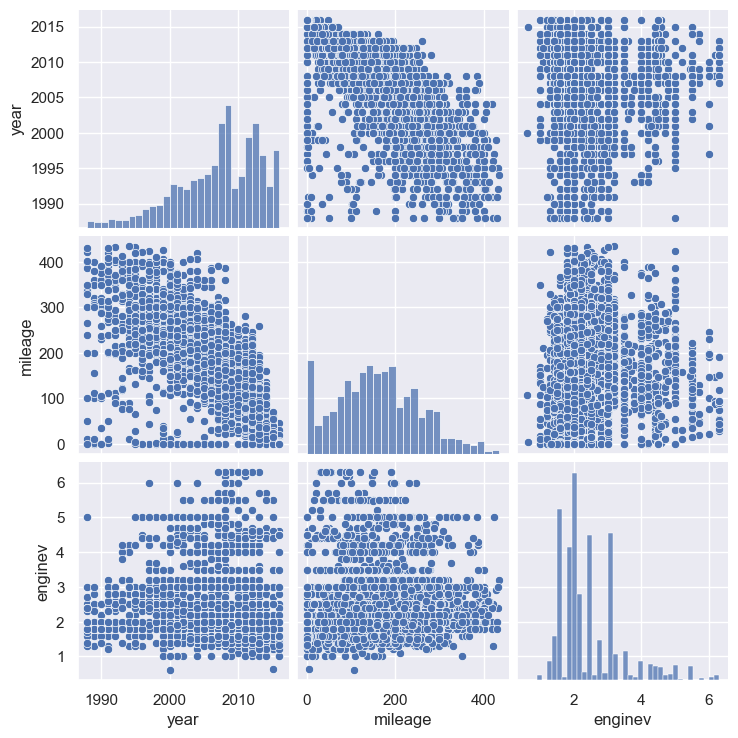

In [45]:
# plotting the scatter matrix of numerical features
sns.pairplot(data_log_linear[numerical_features]);

In [46]:
# displaying correlation values between numerical features
data_log_linear[numerical_features].corr()

,year,mileage,enginev
year,1.000000,-0.711213,-0.025890
mileage,-0.711213,1.000000,0.014314
enginev,-0.025890,0.014314,1.000000


#### >>> High Correlation between mileage & year - Checking Variance Inflation Factor (VIF):

In [47]:
# creating a dataframe of numerical features only
variables = data_log_linear[['year', 'enginev', 'mileage']]

In [48]:
# creating an empty dataframe to store VIF values
VIF = pd.DataFrame()

In [49]:
# looping over numerical features, calculating VIF for each and storing them in the vif column
# in the VIF dataframe
VIF['vif'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

In [50]:
# creating a 'Features' column in the VIF dataframe to store numerical features names
VIF['Features'] = variables.columns

In [51]:
# displaying VIFs
VIF

,vif,Features
0,10.348071,year
1,7.660330,enginev
2,3.862977,mileage


#### >>> High VIFs for year and enginev features

In [52]:
# dropping the year featrure
data_log_linear.drop('year', axis=1, inplace = True)

#### >>> Recalculating VIF

In [53]:
# creating a dataframe of numerical features only
variables = data_log_linear[['enginev', 'mileage']]

In [54]:
# creating an empty dataframe to store VIF values
VIF = pd.DataFrame()

In [55]:
# looping over numerical features, calculating VIF for each and storing them in the vif column
# in the VIF dataframe
VIF['vif'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

In [56]:
# creating a 'Features' column in the VIF dataframe to store numerical features names
VIF['Features'] = variables.columns

In [57]:
# displaying VIFs
VIF

,vif,Features
0,2.858491,enginev
1,2.858491,mileage


## 4- Dummy Variables

In [58]:
# displaying first 3 rows of the data
data_log_linear.head(3)

,brand,body,mileage,enginev,engine type,registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519


In [59]:
# creating a dataframe with numerical + dummy variables
data_dum = pd.get_dummies(data_log_linear, drop_first=True)

In [60]:
# displaying first 3 rows of the data
data_dum.head(3)

,mileage,enginev,log_price,brand_BMW,brand_Mercedes-Benz,brand_Mitsubishi,brand_Renault,brand_Toyota,brand_Volkswagen,body_hatch,body_other,body_sedan,body_vagon,body_van,engine type_Gas,engine type_Other,engine type_Petrol,registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True


In [61]:
# creating a list of dummy column names
dum_cols = data_dum.select_dtypes(include=bool).columns

In [62]:
# converting booleans True/False into 1s/0s
for col in dum_cols:
    data_dum[col] = data_dum[col].astype(int)

In [63]:
# displaying first 3 rows of the data
data_dum.head(3)

,mileage,enginev,log_price,brand_BMW,brand_Mercedes-Benz,brand_Mitsubishi,brand_Renault,brand_Toyota,brand_Volkswagen,body_hatch,body_other,body_sedan,body_vagon,body_van,engine type_Gas,engine type_Other,engine type_Petrol,registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1


## 5- Calculating Variance Inflation Factor (VIF) for All Features

In [64]:
# defining predictors
predictors = data_dum.drop('log_price', axis=1)

In [65]:
# creating an empty dataframe to hold VIF vakues
VIF = pd.DataFrame()

In [66]:
# calculating the VIF of all features and storing them in the 'vif' column in the VIF dataframe
VIF['vif'] = [variance_inflation_factor(predictors, i) for i in range(predictors.shape[1])]

In [67]:
# creating a 'Features' column in the VIF dataframe
VIF['Features'] = predictors.columns

In [68]:
# displating VIF values for all features sorted in an ascending order
VIF.sort_values(by='vif')

,vif,Features
14,1.083532,engine type_Other
8,1.471280,body_hatch
9,1.539711,body_other
11,1.584890,body_vagon
4,1.640074,brand_Mitsubishi
13,1.691087,engine type_Gas
5,2.089901,brand_Renault
6,2.153395,brand_Toyota
2,2.275097,brand_BMW
12,2.472075,body_van


## 6- Fitting a Regression Model

In [69]:
# defining target and predictors
target = data_dum.log_price
predictors = data_dum.drop('log_price', axis=1)

#### 6.1- Standardizing Predictors

In [70]:
# creating a standard scaler class 'scaler'
scaler = StandardScaler()

In [71]:
# fitting the 'scaler' class with predictors
scaler.fit(predictors)

StandardScaler()

In [72]:
# transforming predictors and assigning scaled predictors to the 'predictors_scaled' class
predictors_scaled = scaler.transform(predictors)

#### 6.2- Splitting data into train-test datasets

In [73]:
# displaying the shapes of target and predictors
target.shape, predictors.shape

((3801,), (3801, 17))

In [74]:
# splitting data into train and test data with test size of 20%
y_train, y_test, x_train, x_test = train_test_split(target, predictors_scaled, test_size = 0.2, random_state=42)

In [75]:
# displaying the shapes of the train and test target and predictors
print(f'Target Train Shape: {y_train.shape}')
print(f'Target Test Shape: {y_test.shape}')
print(f'Predictors Train Shape: {x_train.shape}')
print(f'Predictors Test Shape: {x_test.shape}')

Target Train Shape: (3040,)
Target Test Shape: (761,)
Predictors Train Shape: (3040, 17)
Predictors Test Shape: (761, 17)


#### 6.3- Fitting OLS Regression Model into the train dataset

In [76]:
# creating an sklearn linear regression class
reg = LinearRegression()

In [77]:
# fitting predictors (x_train) & target (t_train) into the linear regression model
reg.fit(x_train, y_train.values.reshape(-1, 1))

LinearRegression()

In [78]:
# displaying the regression model intercept
reg.intercept_

array([9.39749978])

In [79]:
# displaying the regression model weights
reg.coef_

array([[-0.45168286,  0.20739335,  0.01516156, -0.00495424, -0.14270492,
        -0.18391305, -0.05961124, -0.09782708, -0.149668  , -0.09884073,
        -0.20349113, -0.12684561, -0.16006053, -0.12382634, -0.02276645,
        -0.14407819,  0.31621702]])

In [80]:
# displaying R2 for the regression model
reg.score(x_train, y_train)

0.7444194662549287

In [81]:
# creating an empty regression summary dataframe
reg_summary = pd.DataFrame()

In [82]:
# setting reg_summary dataframe index to the predictors columns
reg_summary.index = predictors.columns

In [83]:
# creating an 'intercept' (constant) column in the reg_summary dataframe
reg_summary['intercept'] = reg.intercept_[0]

In [84]:
# creating a coefficients column in the reg_summary dataframe
reg_summary['coef'] = reg.coef_.reshape(-1, 1)

In [85]:
# displaying reg_summary dataframe (model intercept and weights)
reg_summary

,intercept,coef
mileage,9.3975,-0.451683
enginev,9.3975,0.207393
brand_BMW,9.3975,0.015162
brand_Mercedes-Benz,9.3975,-0.004954
brand_Mitsubishi,9.3975,-0.142705
brand_Renault,9.3975,-0.183913
brand_Toyota,9.3975,-0.059611
brand_Volkswagen,9.3975,-0.097827
body_hatch,9.3975,-0.149668
body_other,9.3975,-0.098841


#### 6.4- Checking Regression Model Accuracy (Train Data)

In [86]:
# predicting y_hat using x_train predictors
y_hat = reg.predict(x_train)

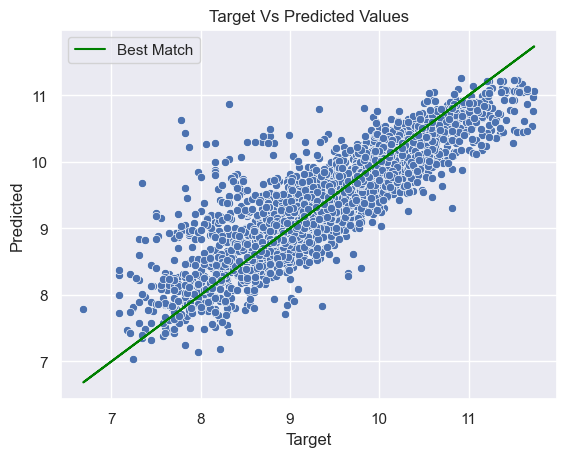

In [87]:
# plotting target (y_train) against predicted values (y_hat) and the best match line for the training dataset
sns.scatterplot(x=y_train, y=y_hat[:, 0])
plt.title('Target Vs Predicted Values')
plt.xlabel('Target')
plt.ylabel('Predicted')
plt.plot(y_train, y_train, color='green', label='Best Match')
plt.legend();

#### >>> OLS Assumptions Revisited: Checking for Homoscedasticity (Residual Variance around the Reg Line)

In [88]:
# calculating Sum of Squared Errors SSE
residuals = (y_train - y_hat[:, 0])

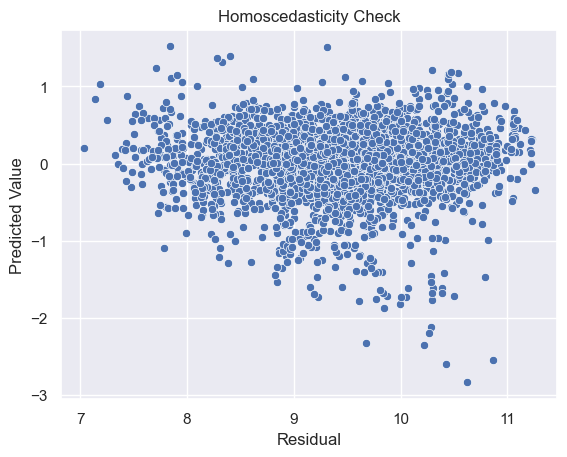

In [89]:
# plotting relationship betweein the residuals and the target
sns.scatterplot(x=y_hat[:, 0], y=residuals)
plt.xlabel('Residual')
plt.ylabel('Predicted Value')
plt.title('Homoscedasticity Check');

#### >>> OLS Assumptions Revisited: Checking for Residual Normality

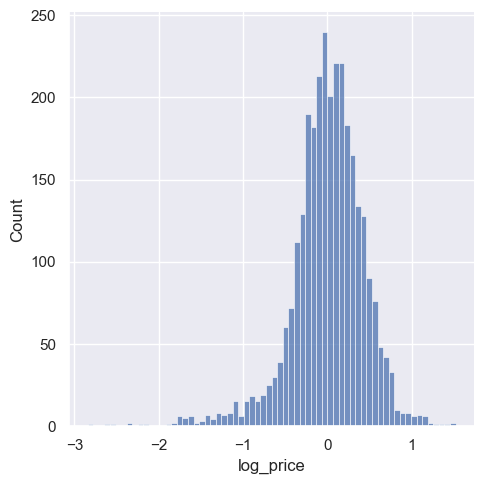

In [90]:
# plotting the distribution of the residuals
sns.displot(residuals);

## 7- Testing the Regression Model

In [91]:
# predicting log(price) using the test dataset predictors
y_hat_test = reg.predict(x_test)

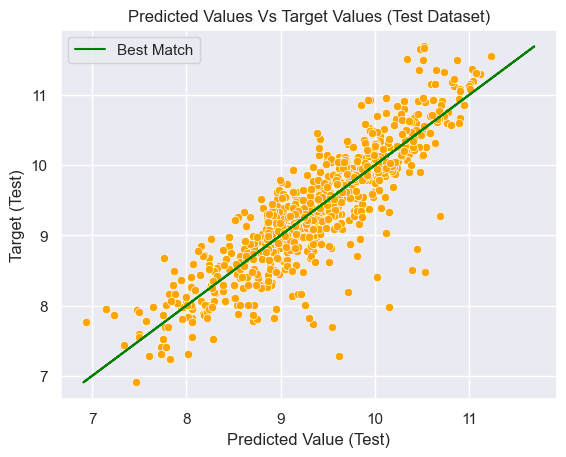

In [92]:
# plotting the relationship between the predicted values (test datasets) and the targets and the best match
sns.scatterplot(x=y_hat_test[:, 0], y=y_test, color='orange')
plt.xlabel('Predicted Value (Test)')
plt.ylabel('Target (Test)')
plt.plot(y_test, y_test, color='green', label='Best Match')
plt.title('Predicted Values Vs Target Values (Test Dataset)')
plt.legend();

### >>> Calculating Mean Absolute Percentage Error for All Outputs

In [93]:
# creating an empty dataframe dfpf
dfpf = pd.DataFrame()

In [94]:
# back transforming y_test columm and creating a 'Y Test' column holding absolute target prices
dfpf['Y Test'] = np.exp(y_test)

In [95]:
# back transforming y_hat_test columm and creating a 'Predicted' column holding absolute predicted prices
dfpf['Predicted'] = np.exp(y_hat_test[:, 0])

In [96]:
# calculating the absolute residual for each predicted value and creating a column of residuals in the dfpd dataframe
dfpf['residual'] = dfpf['Y Test'] - dfpf['Predicted']

In [97]:
# calculating the percentage of the absolute residual from the target value (price) and creating
# a 'redidual%' column in the dfpf dataframe
dfpf['residual%'] = np.abs(dfpf['residual'] / dfpf['Y Test'] * 100)

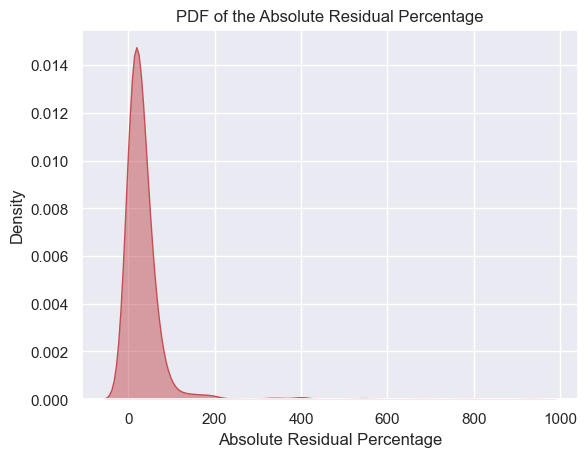

In [98]:
# plotting the PDF of the absolute residual %
sns.kdeplot(dfpf['residual%'], fill=True, alpha=0.5, color='r')
plt.title('PDF of the Absolute Residual Percentage')
plt.xlabel('Absolute Residual Percentage');

In [99]:
# displaying descriptive statistics about the absolute residual and absolute residual percentage
dfpf.describe()

,Y Test,Predicted,residual,residual%
count,761.000000,761.000000,761.000000,761.000000
mean,16762.504744,15218.813537,1543.691207,35.728538
std,17090.364161,11946.708930,9586.300534,69.338263
min,999.000000,1024.780890,-33306.705982,0.070728
25%,6750.000000,7405.388281,-2037.586251,9.864822
50%,10999.000000,11332.246709,145.262165,21.595984
75%,20500.000000,19741.728157,2796.890889,39.002093
max,119000.000000,74858.709779,82220.660775,934.113700


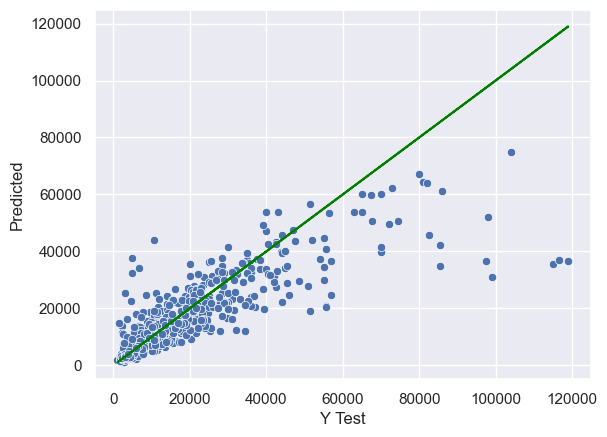

In [100]:
sns.scatterplot(x=dfpf['Y Test'], y=dfpf['Predicted'])
plt.plot(dfpf['Y Test'], dfpf['Y Test'], color='green', label='Best Match')

In [124]:
# displaying datapoints where residual percentage was above 20% of the target
high_res_no = len(dfpf[dfpf['residual%'] > 25]) / len(dfpf)*100
print(f'The model was able to predict prices with residual percentage <= 25% of the target {np.round(100-high_res_no, 2)}% of the times.')
print(f'The model was able to predict prices with residual percentage > 25% of the target {np.round(high_res_no, 2)}% of the times.')

The model was able to predict prices with residual percentage <= 25% of the target 56.77% of the times.
The model was able to predict prices with residual percentage > 25% of the target 43.23% of the times.


In [112]:
# creating a dataframe containing observations with residuals above 20%
high_residuals = dfpf[dfpf['residual%'] > 25].sort_values(by='residual%', ascending=False)

In [113]:
data_log_linear.head()

,brand,body,mileage,enginev,engine type,registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


In [114]:
# merging high residual data with all other features from data_log_linear dataframe
high_res_full = pd.merge(data_log_linear, high_residuals, left_index=True, right_index=True).sort_values(by='residual%', ascending=False)

In [115]:
# printing the head of the high_res_full dataframe
high_res_full.head()

,brand,body,mileage,enginev,engine type,registration,log_price,Y Test,Predicted,residual,residual%
1284,Volkswagen,van,100,1.6,Diesel,yes,7.279319,1450.0,14994.648652,-13544.648652,934.113700
26,Audi,sedan,1,2.3,Gas,yes,7.972466,2900.0,25489.136672,-22589.136672,778.935747
2271,BMW,sedan,11,2.5,Diesel,yes,8.476371,4800.0,37533.897573,-32733.897573,681.956199
1703,BMW,sedan,1,3.0,Petrol,yes,8.507143,4950.0,32533.407417,-27583.407417,557.240554
3568,Toyota,hatch,50,2.0,Petrol,yes,7.696213,2200.0,13891.022041,-11691.022041,531.410093


In [116]:
# printing descriptive statistics about observations with high residuals
high_res_full.describe(include='all')

,brand,body,mileage,enginev,engine type,registration,log_price,Y Test,Predicted,residual,residual%
count,329,329,329.000000,329.000000,329,329,329.000000,329.000000,329.000000,329.000000,329.000000
unique,7,6,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN
top,Mercedes-Benz,sedan,NaN,NaN,Diesel,yes,NaN,NaN,NaN,NaN,NaN
freq,78,143,NaN,NaN,158,291,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,170.176292,2.449240,NaN,NaN,9.281387,17639.556231,14867.260960,2772.295271,67.289604
std,NaN,NaN,101.630035,0.995267,NaN,NaN,0.984613,20799.389883,11449.505634,14062.365262,96.505884
min,NaN,NaN,0.000000,1.000000,NaN,NaN,6.906755,999.000000,1024.780890,-33306.705982,25.083500
25%,NaN,NaN,91.000000,1.800000,NaN,NaN,8.594154,5400.000000,7268.948096,-4169.462321,33.273890
50%,NaN,NaN,167.000000,2.200000,NaN,NaN,9.259131,10500.000000,11359.620649,-993.083359,43.104999
75%,NaN,NaN,250.000000,3.000000,NaN,NaN,9.947504,20900.000000,19583.975457,5931.187001,60.712813
